In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

/home/l7/dev/tools/anaconda3/envs/analytics_system_env_3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/l7/dev/tools/anaconda3/envs/analytics_system_env_3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/l7/dev/tools/anaconda3/envs/analytics_system_env_3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/l7/dev/tools/anaconda3/envs/analytics_system_env_3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [50]:
np.random.seed(1)
n = 2000
m = 125
p = 0.01
snr = 5
sigma = np.sqrt(p * n / (snr**2)) # in practice, this is more of a analytical variable
A = np.random.randn(m,n) # the sampling matrix. This must reflect the problem
# not all sampling matrices of gaussian distribution work. 
x_true = (np.random.rand(n) <= p).astype(np.int) # this is an example measurement to 
# evaluate the mesurement matrix and against. 
v = sigma * np.random.randn(m) # this will be determined by the capacity of the
# sensors. 
y = A.dot(x_true) + v # in practice, this will come fromt he measurements

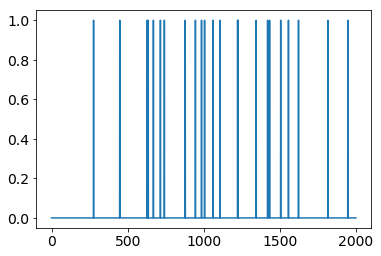

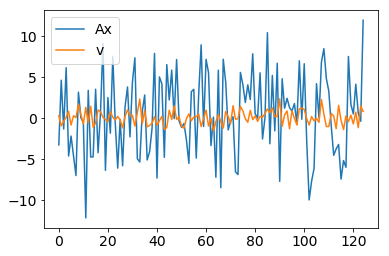

In [51]:
plt.plot(range(n),x_true)
plt.show()
plt.plot(range(m), A.dot(x_true),range(m),v)
plt.legend(('Ax','v'))
plt.show()

In [52]:
x = cp.Variable(shape=n)
tau = 2 * cp.log(1 / p - 1) * sigma**2
obj = cp.Minimize(cp.sum_squares(A * x - y) + tau * cp.sum(x))
constraints = [0 <= x, x<=1]
cp.Problem(obj, constraints).solve(solver='ECOS',verbose=True)
print("final objective value: {}".format(x.value))

x_rml = np.array(x.value).flatten()
x_rnd = (x_rml >= 0.50).astype(int)


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +7.340e+03  -3.950e+03  +5e+04  5e-01  7e-04  1e+00  1e+01    ---    ---    1  1  - |  -  - 
 1  +4.036e+02  -1.063e+03  +9e+03  1e-01  8e-05  2e-01  2e+00  0.8479  1e-02   2  2  2 |  0  0
 2  -2.332e+02  -1.421e+03  +7e+03  1e-01  6e-05  8e-01  2e+00  0.7193  7e-01   2  2  2 |  0  0
 3  -1.474e+02  -1.006e+03  +5e+03  8e-02  4e-05  6e-01  1e+00  0.3035  2e-01   2  2  2 |  0  0
 4  -2.265e+02  -1.002e+03  +5e+03  7e-02  4e-05  7e-01  1e+00  0.3993  8e-01   2  2  2 |  0  0
 5  -1.090e+02  -6.186e+02  +3e+03  5e-02  2e-05  4e-01  8e-01  0.4226  2e-01   2  2  2 |  0  0
 6  -9.915e+01  -5.094e+02  +3e+03  4e-02  1e-05  4e-01  6e-01  0.5689  7e-01   2  2  2 |  0  0
 7  +3.018e+01  -1.492e+02  +1e+03  2e-02  5e-06  2e-01  3e-01  0.9153  4e-01   2  2  2 |  0  0
 8  +1.070e+02  +2.548e+01  +5e+02  8e-03  2e-

In [53]:
import matplotlib

def errors(x_true, x, threshold=.5):
    '''Return estimation errors.

    Return the true number of faults, the number of false positives, and the number of false negatives.
    '''
    n = len(x_true)
    k = sum(x_true)
    false_pos = sum(np.logical_and(x_true < threshold, x >= threshold))
    false_neg = sum(np.logical_and(x_true >= threshold, x < threshold))
    return (k, false_pos, false_neg)

def plotXs(x_true, x_rml, x_rnd, filename=None):
    '''Plot true, relaxed ML, and rounded solutions.'''
    matplotlib.rcParams.update({'font.size': 14})
    xs = [x_true, x_rml, x_rnd]
    titles = ['x_true', 'x_rml', 'x_rnd']

    n = len(x_true)
    k = sum(x_true)

    fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 3))

    for i,x in enumerate(xs):
            ax[i].plot(range(n), x)
            ax[i].set_title(titles[i])
            ax[i].set_ylim([0,1])

    if filename:
        fig.savefig(filename, bbox_inches='tight')

    return errors(x_true, x_rml,.5)

(23, 2, 15)

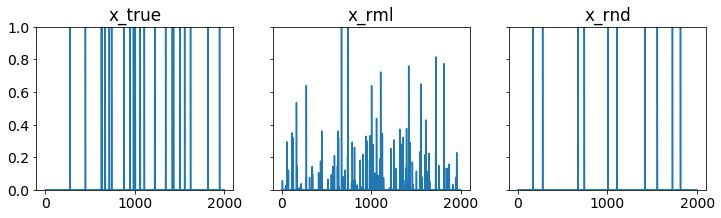

In [54]:
plotXs(x_true, x_rml, x_rnd, 'fault.pdf')